In [4]:
import torch
from d2l import torch as d2l
from torch import nn

In [5]:
n_train, n_test, n_input, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((n_input, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
train_iter = d2l.load_array(train_data, batch_size, is_train=True)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [38]:
def init():
    w = torch.normal(0, 1, (n_input, 1), requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    return w, b

In [42]:
def l2_penalty(w):
    return torch.sum(w ** 2) / 2

w的L2范数是： 13.511579513549805
tensor([[ 6.2399e-01],
        [-1.4852e+00],
        [ 3.6432e-01],
        [ 3.0879e-01],
        [-9.9006e-01],
        [-3.7180e-02],
        [ 9.7268e-01],
        [-4.2397e-01],
        [-1.0979e+00],
        [-8.4186e-01],
        [ 8.3673e-01],
        [-5.7228e-01],
        [ 6.8118e-01],
        [-2.5172e-01],
        [-2.2902e-01],
        [ 1.5200e+00],
        [ 1.4512e+00],
        [ 1.2067e-01],
        [-7.2153e-01],
        [-3.3679e-01],
        [-1.8189e-01],
        [-1.0096e+00],
        [-2.2545e-01],
        [ 2.7326e-01],
        [ 1.2187e+00],
        [ 3.6082e-01],
        [ 2.7728e-01],
        [-8.1701e-01],
        [ 1.2200e+00],
        [-2.0579e+00],
        [ 1.0820e+00],
        [ 4.9053e-01],
        [-8.9439e-01],
        [-5.9125e-02],
        [ 1.4218e+00],
        [ 3.4378e-03],
        [ 5.7221e-01],
        [ 1.2163e+00],
        [ 9.8174e-01],
        [-8.4363e-01],
        [-1.0727e-01],
        [ 4.5167e-01],
      

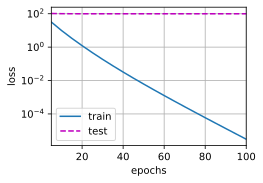

In [43]:
def train(lambd):
    w, b = init()
    print(w)
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    n_epochs = 100
    lr = 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, n_epochs], legend=['train', 'test'])
    for epoch in range(n_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())
    return w, b
w, b = train(0)
y_hat = w @ torch.ones((1, n_input)) + b
print(w, b)


In [ ]:
def train_concise()